In [78]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
# 1. Load the dataset

def train_SVM(data): 
    data = data.drop('file_name', axis = 1)
    data = data.fillna(0)
    cleaned_df = pd.read_csv('full_Table_HIGH_QUAL.csv')
    
    # remove the inf and replace with 0 
    data = data.replace([np.inf, -np.inf], 0)
    pix_int = data['cc_pixel_intensity_ratio']

    for x in data.columns: 
        if x not in cleaned_df.columns: 
            print(x)
            data = data.drop(x, axis = 1)
    # replace nan with 0 
    # just drop the rows with nan
    # 2. Data Preprocessing
    # Assuming 'cell_group' is your target column
    X = data.drop('cell_group', axis=1)  # Features
    y = data['cell_group']  # Target variable

    # 3. Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    print(len(X_train))
    # 4. Feature Scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # 5. Train the SVM Model
    svm_model = SVC(kernel='linear')  # You can choose different kernels (linear, rbf, etc.)
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)
    return [svm_model, data, y_test, y_pred, pix_int, len(X_train), len(X_test)]
# returns model, dataframe, y_test, y_pred, pixel_intensity_ratio, length of train, length of test
import inspect

def var_name(var):
    callers_local_vars = inspect.currentframe().f_back.f_locals.items()
    return [var_name for var_name, var_val in callers_local_vars if var_val is var]

In [79]:
data = pd.read_csv('All_Groups.csv')
 

only_tol_data = data[data['file_name'].str.contains('Tol')]
only_tol_data = only_tol_data[~only_tol_data['file_name'].str.contains('Tol4hr')]

only_TCDD1nM1hr_data = data[data['file_name'].str.contains('TCDD1nM1hr')]
# merge the tol and TCDD1nM1hr data
tol_and_TCDD_data = pd.concat([only_tol_data, only_TCDD1nM1hr_data])
# drop the standalones
network_data = data[data['edges'] >1]

network_tol = network_data[network_data['file_name'].str.contains('Tol')]
network_tol = network_tol[~network_tol['file_name'].str.contains('Tol4hr')]

network_TCDD1nM1hr = network_data[network_data['file_name'].str.contains('TCDD1nM1hr')]
network_tol_and_TCDD_data = pd.concat([network_tol, network_TCDD1nM1hr])


In [80]:
import matplotlib.pyplot as plt

def plot_classification_report_and_confusion_matrix(data, y_test, y_pred, pix_int, title):
    # create a 1x4 subplot
    fig, ax = plt.subplots(1, 4, figsize=(20, 5))

    fig.suptitle(title)
    # draw a plot to show this for 0, 1
    report = classification_report(y_test, y_pred, output_dict=True)
    df = pd.DataFrame(report).transpose()
    df = df.drop('support', axis = 1)

    df.iloc[0:2].plot(kind='bar', ax=ax[0])
    # have a number on top of each of these 
    ax[0].set_title('training points {}'.format(round(len(data) * 0.8)))
    # add the confusion matrix to the plot
    conf_matrix = confusion_matrix(y_test, y_pred)
    ax[1].imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Greens)
    ax[1].text(0, 0.25, conf_matrix[0][0], ha='center', va='center')
    ax[1].text(0, 0.75, conf_matrix[0][1], ha='center', va='center')
    ax[1].text(1, 0.25, conf_matrix[1][0], ha='center', va='center')
    ax[1].text(1, 0.75, conf_matrix[1][1], ha='center', va='center')

    ax[1].set_xlabel('Predicted')
    ax[1].set_title('Confusion Matrix')

    # plot degree distribution of cell_group
    cell_group_counts = data['cell_group'].value_counts()
    ax[2].bar(cell_group_counts.index, cell_group_counts.values)
    ax[2].set_title('Degree Distribution of cell_group')
    # add the excat number of each cell group
    ax[2].set_ylim(0, cell_group_counts.max() + 10)
    ax[2].set_xticks = [0, 1]

    ax[2].text(0, cell_group_counts[0], cell_group_counts[0], ha='center', va='top')
    ax[2].text(1, cell_group_counts[1], cell_group_counts[1], ha='center', va='top')
    # put it just above the bar
    

    ax[3].scatter(data['cc_length_(um)'], pix_int, marker = '.')
    ax[3].set_title('Network Length vs Pixel Intensity Ratio')
    ax[3].set_xscale('log')
    ax[3].set_ylim(0, 0.7)
    # set a horizontal line at y = 0.1
    ax[3].axhline(y=0.1, color='r', linestyle='--')

    # set ylim to all 
    ax[0].set_ylim(0, 1)
    ax[2].set_ylim(0, 7200)

# save the figure as a png
    plt.savefig(title + '.png', dpi = 300)
    return fig
# returns model, dataframe, y_test, y_pred, pixel_intensity_ratio, length of train, length of test
# def plot_classification_report_and_confusion_matrix(data, y_test, y_pred, pix_int, title):



In [81]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Assuming you have already loaded and preprocessed your data (steps 1 and 2)

def train_RF(data): 
# 3. Split the data into train and test sets
    data = data.drop('file_name', axis = 1)
    data = data.fillna(0)
    cleaned_df = pd.read_csv('full_Table_HIGH_QUAL.csv')

    # remove the inf and replace with 0 
    data = data.replace([np.inf, -np.inf], 0)
    pix_int = data['cc_pixel_intensity_ratio']

    for x in data.columns: 
        if x not in cleaned_df.columns: 
            print(x)
            data = data.drop(x, axis = 1)
    # replace nan with 0 
    # just drop the rows with nan
    # 2. Data Preprocessing
    # Assuming 'cell_group' is your target column
    X = data.drop('cell_group', axis=1)  # Features
    y = data['cell_group']  # Target variable


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 4. Train the Random Forest Model
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the number of estimators
    rf_model.fit(X_train, y_train)

    # 5. Evaluate the model
    y_pred = rf_model.predict(X_test)
    return [rf_model, data, y_test, y_pred, pix_int, len(X_train), len(X_test)]


In [82]:
entire_dataset_model = train_SVM(data)
only_tol_model = train_SVM(only_tol_data)
only_TCDD1nM1hr_model = train_SVM(only_TCDD1nM1hr_data)
tol_and_TCDD_model = train_SVM(tol_and_TCDD_data)
network_all_model = train_SVM(network_data)
network_tol_model = train_SVM(network_tol)
network_TCDD1nM1hr_model = train_SVM(network_TCDD1nM1hr)
network_tol_and_TCDD_model = train_SVM(network_tol_and_TCDD_data)

list_of_models = [entire_dataset_model, only_tol_model, only_TCDD1nM1hr_model, tol_and_TCDD_model, network_all_model, network_tol_model, network_TCDD1nM1hr_model, network_tol_and_TCDD_model]
for x in list_of_models: 
    plot_classification_report_and_confusion_matrix(x[1], x[2], x[3], x[4], 'SVM ' + str(x[5]) + ' training points')


cc_pixel_intensity_ratio
9662
cc_pixel_intensity_ratio
788
cc_pixel_intensity_ratio
1036
cc_pixel_intensity_ratio
1824
cc_pixel_intensity_ratio
1903
cc_pixel_intensity_ratio
150
cc_pixel_intensity_ratio
193
cc_pixel_intensity_ratio
344


In [83]:
network_tol_model[1]

,x,y,z,node_x,line_id,point_id,degree_x,vol_cc_x,avg_PK_Of_element_x,element_connectivity_x,...,degree_distribution_4,degree_distribution_5,degree_distribution_7,degree_distribution_0,degree_distribution_6,degree_distribution_2,degree_distribution_8,degree_distribution_9,degree_distribution_11,degree_distribution_10
740,11.3360,18.7200,9.0000,0.0,653,2,1.0,0.35693,2.0,0.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
744,16.9520,25.6880,7.0000,10.0,623,21,1.0,6.04614,2.0,0.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
756,17.4720,28.3920,6.0000,31.0,321,34,1.0,10.35632,2.5,0.400000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
762,18.7200,17.7840,5.5000,47.0,594,31,1.0,19.06320,2.5,0.400000,...,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
766,19.7253,33.6267,4.7500,55.0,571,9,3.0,2.48227,2.0,0.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,17.6800,7.2800,2.5000,236.0,147,4,1.0,0.75712,2.0,0.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10906,5.1307,7.2453,2.3333,237.0,69,7,3.0,1.11946,3.0,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10909,8.1120,4.9920,2.5000,249.0,50,2,3.0,1.09242,2.0,0.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10920,13.2080,14.3520,2.0000,289.0,102,10,1.0,0.70845,2.0,0.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [84]:
list_of_models[3][1]

,x,y,z,node_x,line_id,point_id,degree_x,vol_cc_x,avg_PK_Of_element_x,element_connectivity_x,...,degree_distribution_4,degree_distribution_5,degree_distribution_7,degree_distribution_0,degree_distribution_6,degree_distribution_2,degree_distribution_8,degree_distribution_9,degree_distribution_11,degree_distribution_10
740,11.336,18.720,9.0,0.0,653,2,1.0,0.35693,2.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
741,13.416,26.208,8.5,1.0,654,4,1.0,0.29203,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
742,11.232,17.264,8.0,6.0,650,2,1.0,0.04326,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
743,9.880,14.976,7.5,8.0,649,5,1.0,0.15142,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
744,16.952,25.688,7.0,10.0,623,21,1.0,6.04614,2.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10058,14.768,7.696,1.5,386.0,9,3,1.0,0.04867,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10059,5.928,6.760,1.5,388.0,8,2,1.0,0.08112,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10060,14.976,6.448,1.5,390.0,7,2,1.0,0.04326,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10061,12.168,5.824,1.5,392.0,6,0,1.0,0.11357,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


cc_pixel_intensity_ratio
cc_pixel_intensity_ratio
cc_pixel_intensity_ratio
cc_pixel_intensity_ratio
cc_pixel_intensity_ratio
cc_pixel_intensity_ratio
cc_pixel_intensity_ratio
cc_pixel_intensity_ratio


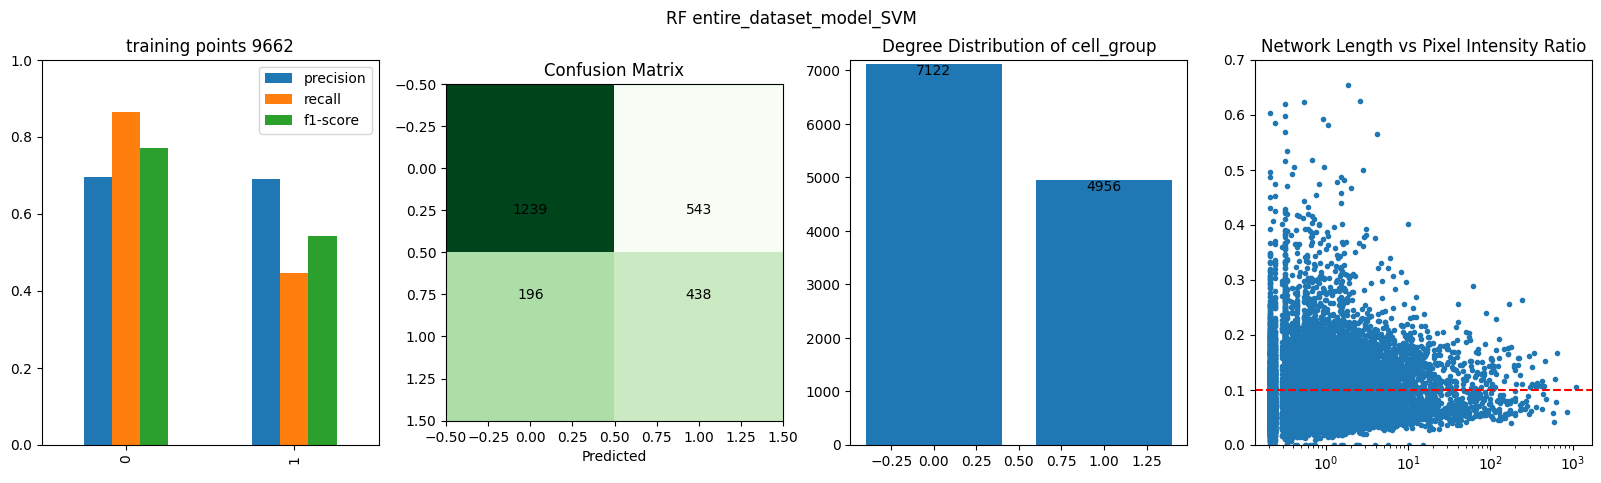

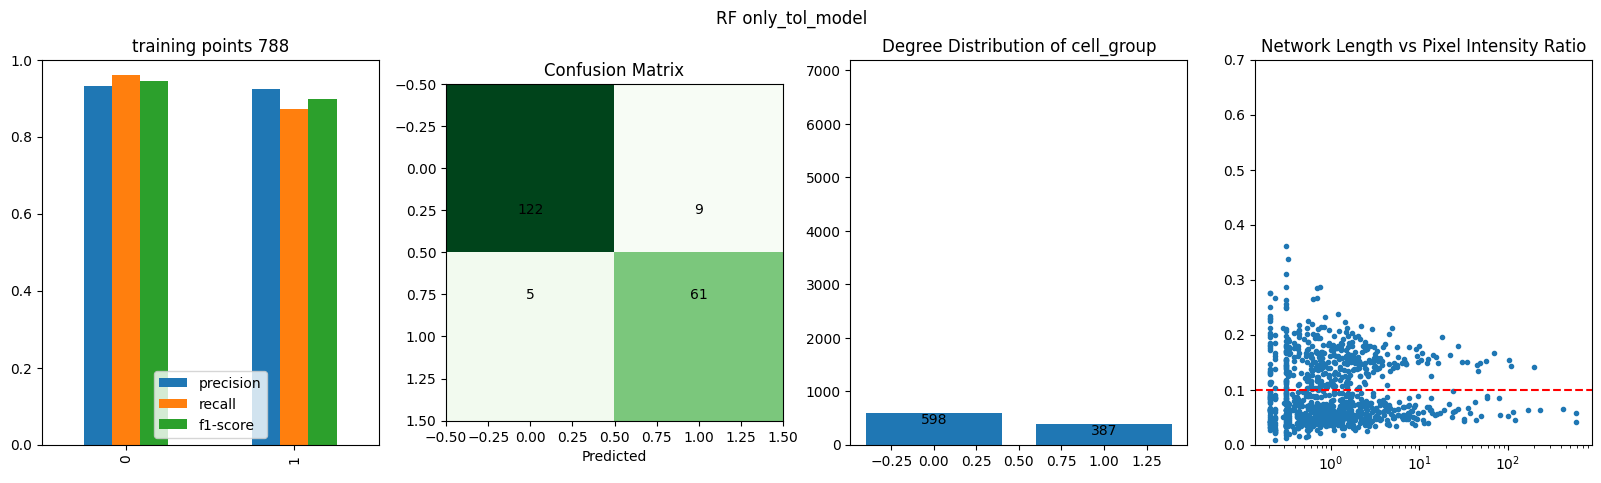

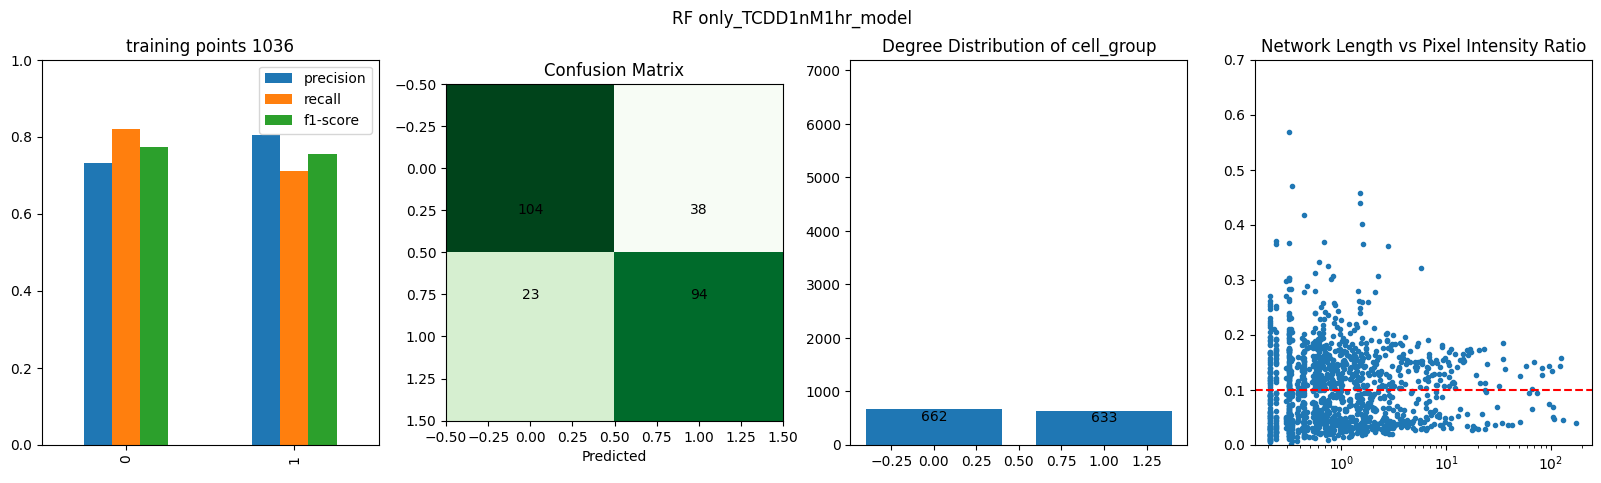

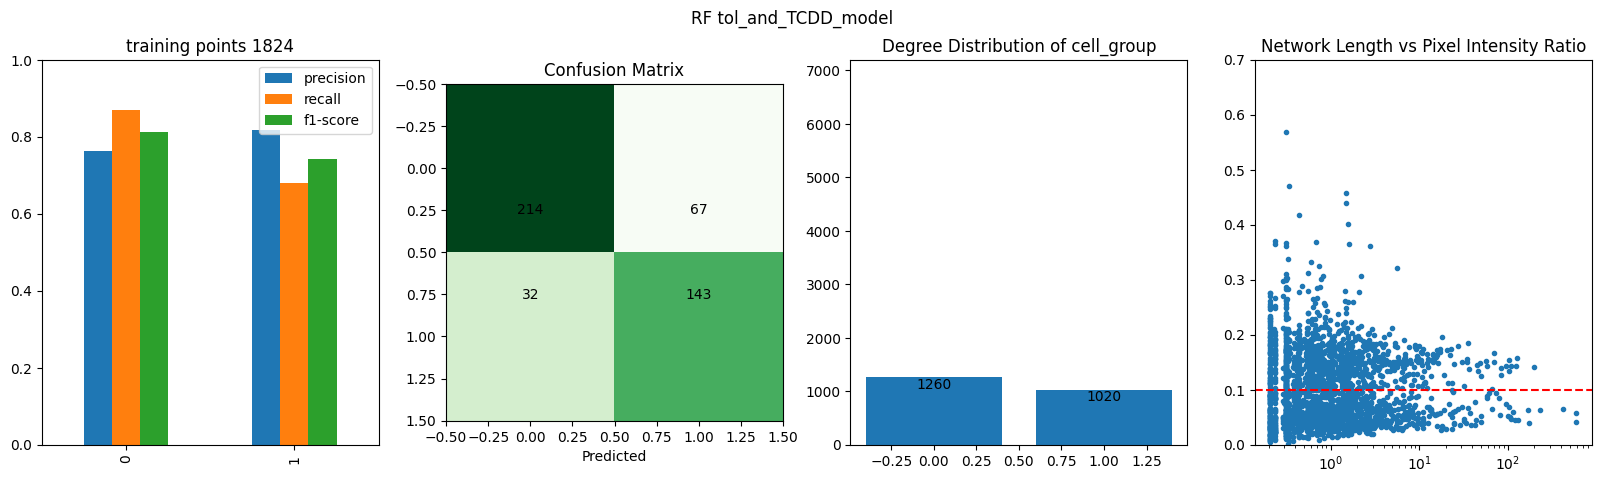

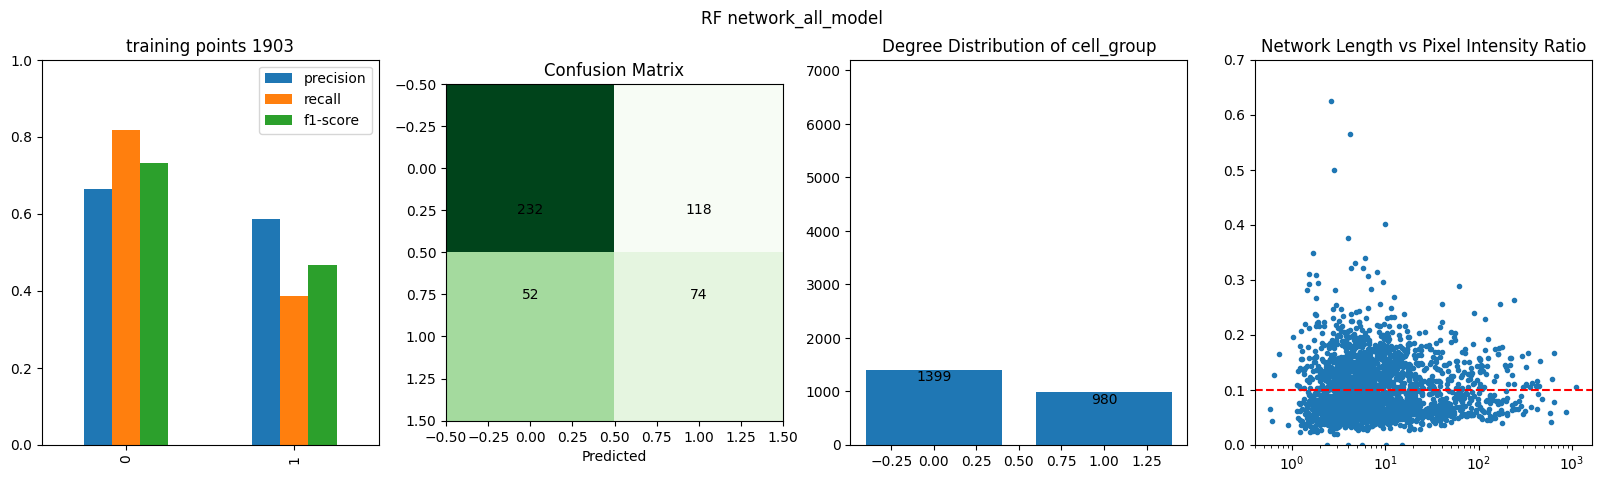

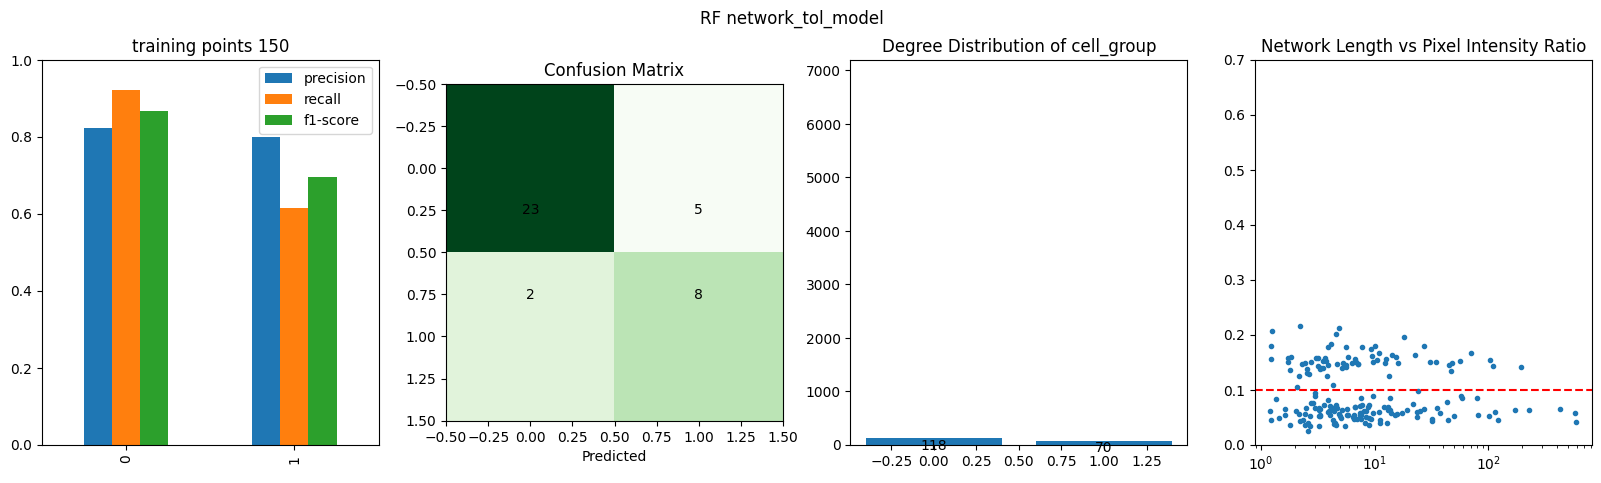

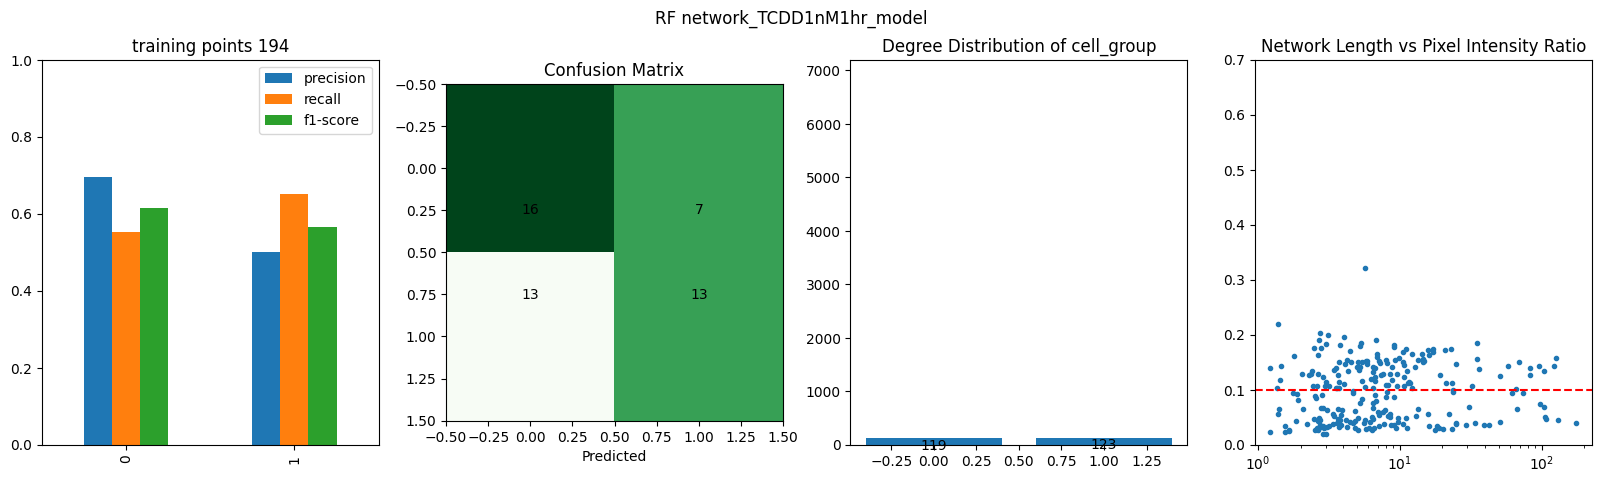

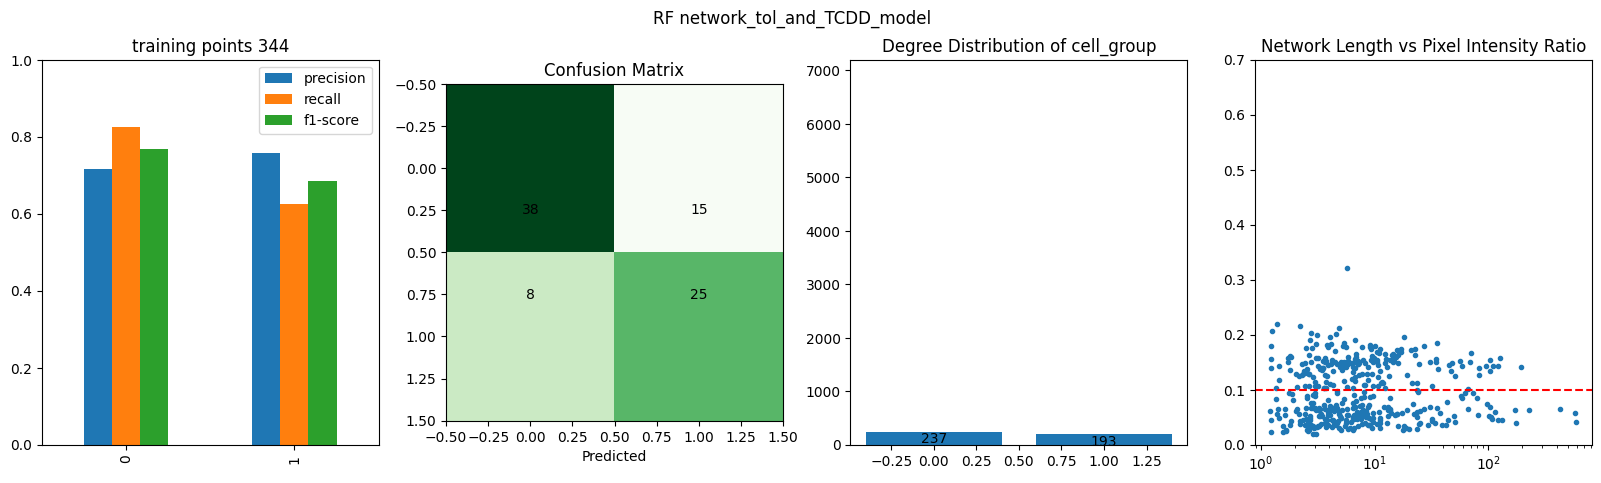

In [92]:
 
entire_dataset_model = train_RF(data)
only_tol_model = train_RF(only_tol_data)
only_TCDD1nM1hr_model = train_RF(only_TCDD1nM1hr_data)
tol_and_TCDD_model = train_RF(tol_and_TCDD_data)
network_all_model = train_RF(network_data)
network_tol_model = train_RF(network_tol)
network_TCDD1nM1hr_model = train_RF(network_TCDD1nM1hr)
network_tol_and_TCDD_model = train_RF(network_tol_and_TCDD_data)

list_of_models = [entire_dataset_model, only_tol_model, only_TCDD1nM1hr_model, tol_and_TCDD_model, network_all_model, network_tol_model, network_TCDD1nM1hr_model, network_tol_and_TCDD_model]

for x in list_of_models:
    name = var_name(x)
    name = [x for x in name if 'model' in x][0]

    entire = plot_classification_report_and_confusion_matrix(x[1], x[2], x[3],  x[4],  'RF ' + name)

In [89]:
for x in list_of_models:
  print(var_name(x))

['x', 'entire_dataset_model_SVM']
['only_tol_model', 'x']
['only_TCDD1nM1hr_model', 'x']
['tol_and_TCDD_model', 'x']
['network_all_model', 'x']
['network_tol_model', 'x']
['network_TCDD1nM1hr_model', 'x']
['network_tol_and_TCDD_model', 'x']


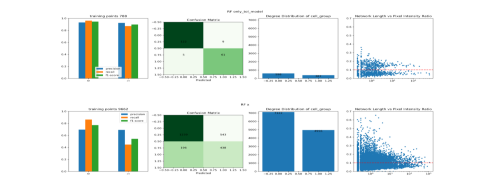

In [86]:
import os
import re
from PIL import Image
import matplotlib.pyplot as plt
from collections import defaultdict

# Group images by ending word
image_groups = defaultdict(list)
for file in os.listdir('./images'):
    if re.match(r'RF', file):
        ending_word = file.split('_')[-1]
        image_groups[ending_word].append(plt.imread(os.path.join('./images', file)))

# Calculate number of rows
num_pairs = len(image_groups)
num_rows = 2
num_cols = 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5, num_rows))

# Plot each pair of images side by side
for i, images in enumerate(image_groups.values()):
    row = i // num_cols
    col = i % num_cols * 2  # Multiply by 2 to leave space for the second image in the pair
    ax1 = axes[row]
    ax2 = axes[row]
    ax1.imshow(images[0], aspect='auto')
    # ax2.imshow(images[1], aspect='auto')
    ax1.axis('off')

# Hide empty subplots if number of pairs is odd
if num_pairs % 2 != 0:
    axes[num_rows - 1, 1].axis('off')

# keep original size of image

plt.tight_layout()
plt.show()


In [87]:
def prep_for_test(data): 
    data = data.drop('file_name', axis = 1)
    new_y_real = data['cell_group']
    data = data.drop('cell_group', axis=1)
    data = data.fillna(0)
#   drop values that are infinite 
    data = data.replace([np.inf, -np.inf], 0)
    return data, new_y_real


new_X_test = pd.read_csv('All_Groups.csv')
new_X_test, new_y = prep_for_test(new_X_test)
new_X_test = new_X_test[X_test.columns] # making the order the same



NameError: name 'X_test' is not defined

Confusion Matrix:
[[7122    0]
 [4956    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.59      1.00      0.74      7122
           1       0.00      0.00      0.00      4956

    accuracy                           0.59     12078
   macro avg       0.29      0.50      0.37     12078
weighted avg       0.35      0.59      0.44     12078



/home/mitosim2/miniconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/home/mitosim2/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mitosim2/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mitosim2/miniconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0

Text(0.5, 1.0, 'SVM Classification Report, Trained on Tol + TCDD, Tested on All')

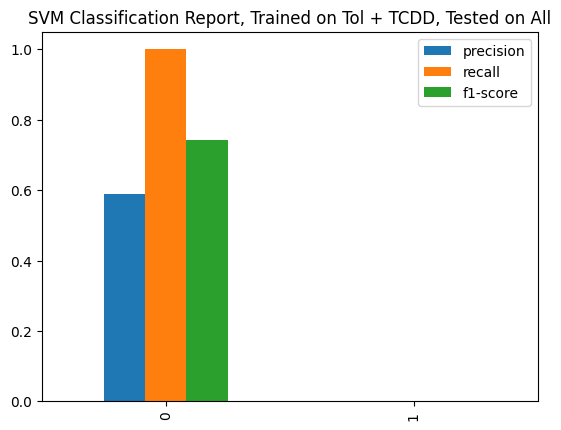

In [ ]:
# see how accurate new_pred and new_y are 
# filli n the Nan with 0s
new_pred = svm_model.predict(new_X_test)
print("Confusion Matrix:")
print(confusion_matrix(new_y, new_pred))

print("\nClassification Report:")
print(classification_report(new_y, new_pred))


# store the classification report and turn into barchart
report = classification_report(new_y, new_pred, output_dict=True)
df = pd.DataFrame(report).transpose()
# draw a plot to show this
df = df.drop('support', axis = 1)
# draw a plot to show this for 0, 1 a
df.iloc[0:2].plot(kind='bar')
plt.title('SVM Classification Report, Trained on Tol + TCDD, Tested on All')

Confusion Matrix:
[[4506 2616]
 [2815 2141]]

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.63      0.62      7122
           1       0.45      0.43      0.44      4956

    accuracy                           0.55     12078
   macro avg       0.53      0.53      0.53     12078
weighted avg       0.55      0.55      0.55     12078



Text(0.5, 1.0, 'RF Classification Report, Trained on Tol + TCDD, Tested on All')

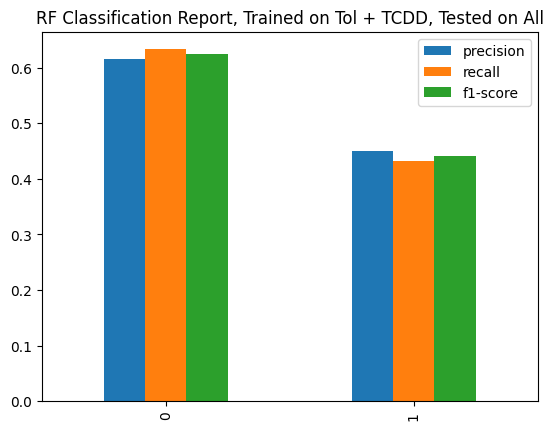

In [ ]:
# see how accurate new_pred and new_y are 
new_pred = rf_model.predict(new_X_test)

print("Confusion Matrix:")
print(confusion_matrix(new_y, new_pred))

print("\nClassification Report:")
print(classification_report(new_y, new_pred))


# store the classification report and turn into barchart
report = classification_report(new_y, new_pred, output_dict=True)
df = pd.DataFrame(report).transpose()
# draw a plot to show this
df = df.drop('support', axis = 1)
# draw a plot to show this for 0, 1 a
df.iloc[0:2].plot(kind='bar')
plt.title('RF Classification Report, Trained on Tol + TCDD, Tested on All')